In [1]:
%matplotlib inline
import  numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set()

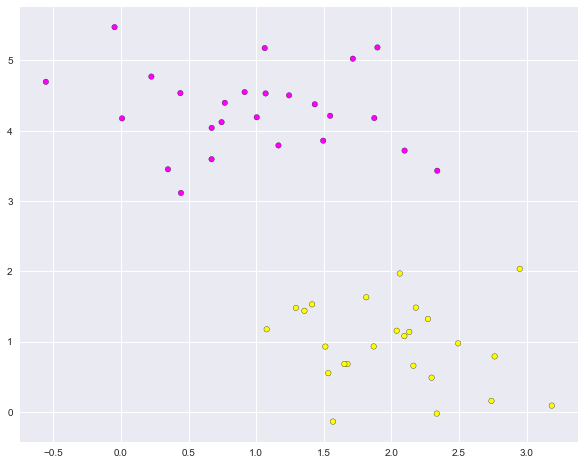

In [2]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=50, centers=2, 
                 random_state=0, cluster_std=.6)
plt.subplots(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=y, cmap="spring", s=30,edgecolor="k",lw=.3)

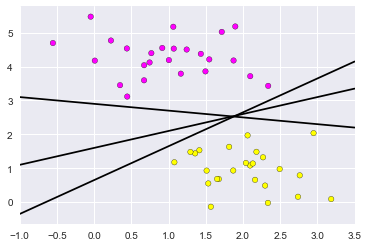

In [3]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1], c=y, s=30, edgecolors="k", lw=.3, cmap="spring")

for m, b  in [(1,.65),(.5,1.6), (-.2, 2.9)]:
    plt.plot(xfit, m * xfit+b, "-k")
plt.xlim(-1,3.5);

FITTING A SUPPORT VECTOR MACHINE

In [4]:
from sklearn.svm import SVC 
model = SVC(kernel="linear")
model.fit(X, y)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [5]:
def plot_svc_decision_function(model, ax=None):
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = model.decision_function([xi, yj])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

ValueError: Expected 2D array, got 1D array instead:
array=[-0.75155573 -0.4325781 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

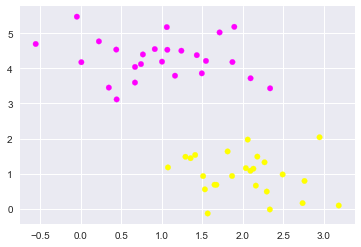

In [6]:
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap="spring")
plot_svc_decision_function(model, ax=None);